In [52]:
from pymongo import MongoClient
client = MongoClient('localhost', 27017)

In [61]:
import nltk
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd

In [62]:
db = client.local

In [63]:
testData = db.testTweets
trainData = pd.read_csv('trainTweets.csv', header='infer')

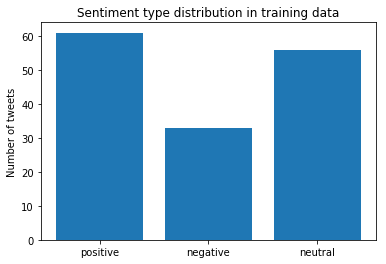

In [65]:
numPos = len(trainData[trainData['category'] == 'positive'])
numNeg = len(trainData[trainData['category'] == 'negative'])
numNeut = len(trainData[trainData['category'] == 'neutral'])

sentiments = ('positive', 'negative', 'neutral')
x = np.arange(len(sentiments))
y = [numPos, numNeg, numNeut]

plt.bar(x, y)
plt.xticks(x, sentiments)
plt.ylabel('Number of tweets')
plt.title('Sentiment type distribution in training data')

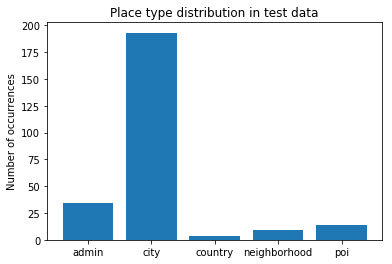

In [56]:
place_types = []
for tweet in testData.find():
    place_types.append(tweet['place_type'])
place_types = nltk.FreqDist(place_types)

places = []
frequencies = []
for place in place_types.items():
    places.append(place[0])
    frequencies.append(place[1])

x = np.arange(len(places))
y = frequencies

plt.bar(x, y)
plt.xticks(x, places)
plt.ylabel('Number of occurrences')
plt.title('Place type distribution in test data')

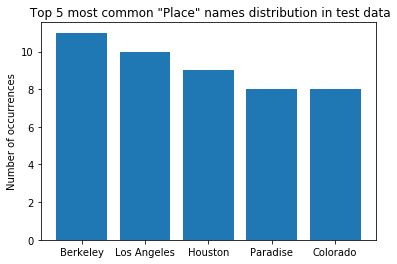

In [57]:
place_names = []
for tweet in testData.find():
    place_names.append(tweet['name'])
place_names = nltk.FreqDist(place_names)

names = []
frequencies = []
place_names = place_names.most_common(5)
for name in place_names:
    names.append(name[0])
    frequencies.append(name[1])

x = np.arange(len(names))
y = frequencies

plt.bar(x, y)
plt.xticks(x, names)
plt.ylabel('Number of occurrences')
plt.title(' Top 5 most common "Place" names distribution in test data')